# Assignment 2 <br> Muhammad Bilal Naseer  <br>202046892

## Logistic Regression:
Logistic regression is a classic statistical method used for binary classification tasks. Unlike linear regression, which predicts continuous outcomes, logistic regression models the probability that an instance belongs to a particular class. It's a go-to method due to its simplicity, interpretability, and efficiency in handling large datasets. Logistic regression assumes a linear relationship between the independent variables and the log-odds of the dependent variable, making it well-suited for scenarios where the decision boundary is linear or can be approximated as such. It serves as a strong baseline method for classification tasks, providing a benchmark for comparing the performance of more complex models. <br> <br>

## Support Vector Machine (SVM):
Support Vector Machine (SVM) is a powerful supervised learning algorithm used for both classification and regression tasks. It works by finding the hyperplane that best separates the classes in the feature space while maximizing the margin between them. SVM is chosen for its ability to handle both linear and nonlinear relationships through the use of kernel functions, making it versatile for various types of datasets. It is particularly effective in high-dimensional spaces and when the number of features exceeds the number of samples. SVM's ability to find the optimal decision boundary makes it robust against overfitting and suitable for scenarios where the data may not be linearly separable.<br><br>

## Random Forest Classifier:
Random Forest Classifier is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees. It's chosen for its robustness to overfitting, ease of use, and ability to handle both numerical and categorical data. Random Forest builds diverse trees by randomly selecting subsets of features and bootstrap samples of the data, which helps capture complex relationships and reduce variance. It's particularly effective when dealing with noisy or missing data, and it can handle large datasets with high dimensionality. Random Forest Classifier is known for its high predictive accuracy and resistance to overfitting, making it a popular choice for various classification tasks.<br><br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from prettytable import PrettyTable
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc


# Reading the data from the files and storing them in the following dataframes.
df = pd.read_csv('A3_TrainData.tsv', sep='\t')
test_data = pd.read_csv('A3_TestData.tsv', sep='\t')

In [2]:
# Explore class distribution
class_distribution = df['label'].value_counts()
print(class_distribution)


0    2772
1     228
Name: label, dtype: int64


## Reason for Choosing Accuracy
Accuracy measures the proportion of true results (both true positives and true negatives) among the total number of cases examined. It's a straightforward and intuitive metric, making it a popular first choice for classification problems. Using accuracy as a scoring parameter is particularly useful when you are interested in the overall success of the model in assigning the correct labels, without distinguishing between the types of errors made. It provides a quick and easy way to gauge the model's performance, especially in scenarios where every incorrect classification is equally important.

However, it's important to consider that Accuracy can misleadingly suggest high performance on imbalanced datasets by simply predicting the majority class. Hence, the choice of accuracy reflects an initial assumption that the model's overall rate of correct predictions is the most relevant measure of its effectiveness.

In [3]:
# Prepare data and target
X = df.drop('label', axis=1)  # Replace 'target_column' with your actual target column name
y = df['label']

baseModel = LogisticRegression(random_state=42, max_iter=1000)

# Stratified K-Fold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(baseModel, X, y, cv=cv, scoring='accuracy')

print("Mean Accuracy of Logistic Regression Model:", np.mean(results))

Mean Accuracy of Logistic Regression Model: 0.908


## Justification
In machine learning the parameters we choose are very important for optimizing the performance.For both the models: Support Vector Machines and Random Forest classifier I used hyperparameter tuning in which a grid of potential parameters are passed and evaluated. This process involves systematically testing different combination of these parameters to determine which one yields the best results.This methodical approach to selecting parameters is based on the understanding that the performance of machine learning models is highly sensitive to the choice of these hyperparameters, and that optimal settings can significantly enhance model efficacy.

In [4]:
svm_model = SVC()

# Define  parameter grid
svm_param_grid = {'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']}

stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform grid search for SVM with a smaller dataset
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=stratified_cv, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X, y)

print("SVM - Best Hyperparameters:", svm_grid_search.best_params_)
print("Best accuracy for SVM:", svm_grid_search.best_score_)


SVM - Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy for SVM: 0.9246666666666666


In [5]:
rf_model = RandomForestClassifier()

# Define the parameter grid for Random Forest
rf_param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]}

# Perform grid search for Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=stratified_cv, scoring='accuracy')
rf_grid_search.fit(X, y)

print("Random Forest - Best Hyperparameters:", rf_grid_search.best_params_)
print("Best accuracy for Random Forest:", rf_grid_search.best_score_)

Random Forest - Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy for Random Forest: 0.924


## Table for Best Results and Parameters

In [15]:
# Create a PrettyTable object
table = PrettyTable()

# Add columns
table.field_names = ["Models ", "Best Result ", "Parameters"]

# Add rows
table.add_row(["Logistic Regression", 0.908, "max_iter=1000, random_state=42"])
table.add_row(["SVM Model", 0.9246, "'C': 10, 'gamma': 'scale', 'kernel': 'rbf'"])
table.add_row(["Random Forest Model", 0.924, "'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100"])

# Print the table
print(table)

+---------------------+--------------+-------------------------------------------------------------------------------------+
|       Models        | Best Result  |                                      Parameters                                     |
+---------------------+--------------+-------------------------------------------------------------------------------------+
| Logistic Regression |    0.908     |                            max_iter=1000, random_state=42                           |
|      SVM Model      |    0.9246    |                      'C': 10, 'gamma': 'scale', 'kernel': 'rbf'                     |
| Random Forest Model |    0.924     | 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100 |
+---------------------+--------------+-------------------------------------------------------------------------------------+


## Figures 
### 1) Precision-Recall Curves
### 2) ROC Curves

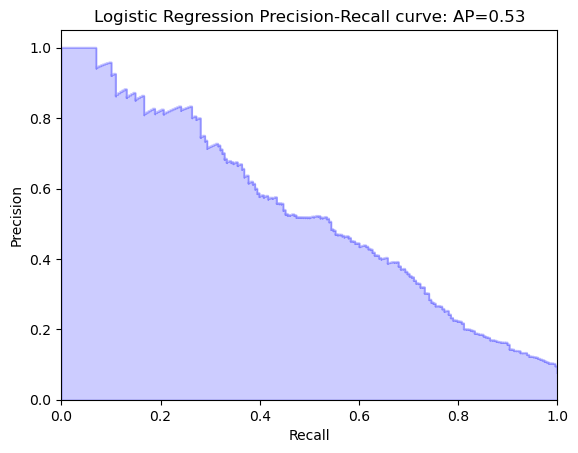

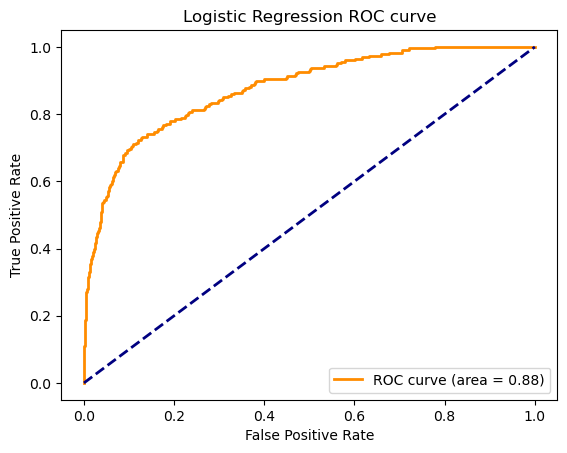

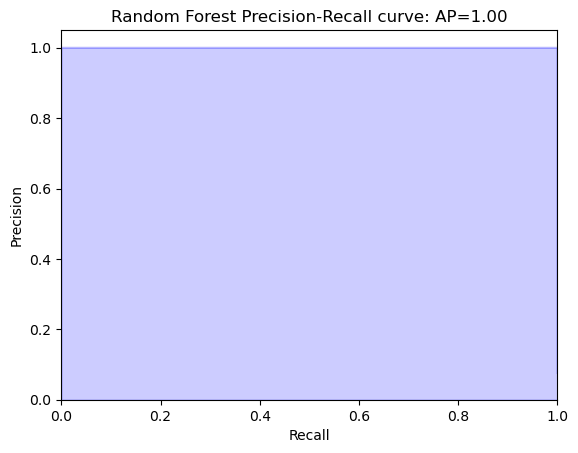

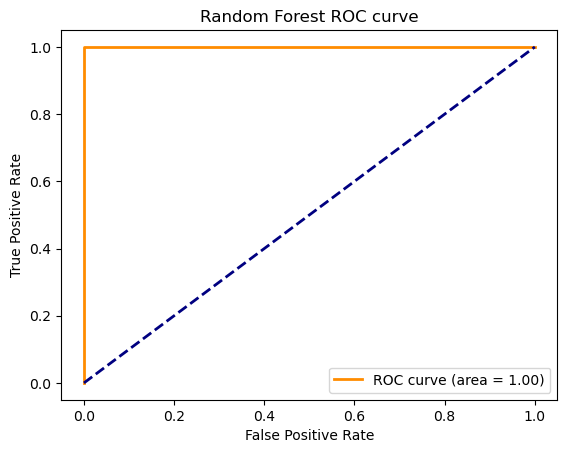

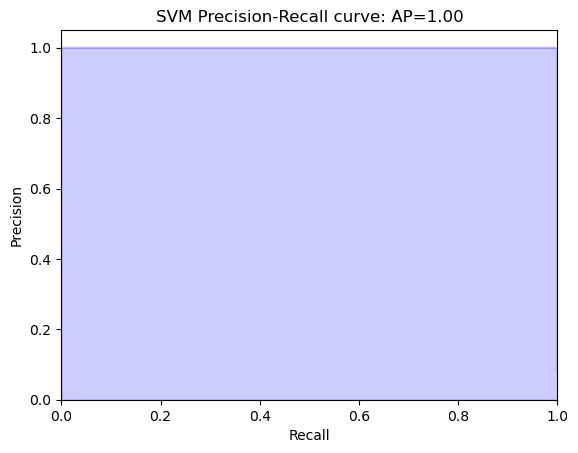

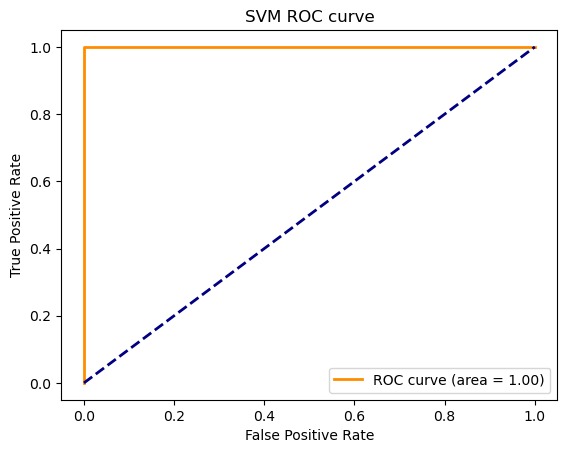

In [8]:
# Define a function to plot precision-recall curve and ROC curve
def plot_curves(model, X, y, name):
    # Fit the model
    model.fit(X, y)
    
    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y, model.predict_proba(X)[:, 1])
    pr_auc = auc(recall, precision)
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y, model.predict_proba(X)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # Plot precision-recall curve
    plt.figure()
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{name} Precision-Recall curve: AP={pr_auc:.2f}')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Initialize the best models per method with the best hyper-parameter settings
best_logreg = LogisticRegression(max_iter=1000, random_state=42)
best_rf = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)
best_svm = SVC(**svm_grid_search.best_params_, random_state=42, probability=True)

# Plot precision-recall and ROC curves for the best models per method
plot_curves(best_logreg, X, y, "Logistic Regression")
plot_curves(best_rf, X, y, "Random Forest")
plot_curves(best_svm, X, y, "SVM")

In [10]:
# Compare the mean validation scores of the models
mean_validation_scores = {
    "Logistic Regression": np.mean(results),
    "Random Forest": np.mean(rf_grid_search.cv_results_['mean_test_score']),
    "SVM": np.mean(svm_grid_search.cv_results_['mean_test_score'])
}

best_model_name = max(mean_validation_scores, key=mean_validation_scores.get)
best_model = None

# Select the best model
if best_model_name == "Logistic Regression":
    best_model = best_logreg
elif best_model_name == "Random Forest":
    best_model = best_rf
elif best_model_name == "SVM":
    best_model = best_svm

print("Best Model Overall:", best_model_name)

# Create the final model using the best hyper-parameters and all of the training data
best_model.fit(X, y)

Best Model Overall: Random Forest


RandomForestClassifier(max_depth=10, random_state=42)

In [12]:
# Use the final model to predict the likelihood to belong to class 1 for the test instances
predictions = best_model.predict_proba(test_data)[:, 1]

# Write the predicted values to a file
with open('A3_predictions_202046892.txt', 'w') as f:
    for prediction in predictions:
        f.write(f'{prediction}\n')

# Attributions
In this asignment i utilized the following online resources:<br>
• https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html <br>
• https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html <br>
• https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examplesa9676b5cac12 <br>
• https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators <br>
• https://machinelearningmastery.com/k-fold-cross-validation/ <br>
 
I also used chatgpt for better understanding some concepts and making my code more efficient. <br>

For this assignment I also discussed my approach and what how I reached the final solutions with my fellow coursemates:<br>
1) Syed Basim Ali<br>
2) Sara Hamid<br>
3) Muneeb-ur-Rehman
